### 📌 Introduction

This dataset has records of 155 hepatitis patients, with details like symptoms, lab results, treatments, and survival status (`live=0` or `die=1
`). It’s used for medical data analysis and machine learning tasks.

The goal of this EDA is to:
- Check data quality  
- Find patterns and trends  
- Prep the data for modeling


### 1. Importing Libraries  
- `pandas` for data manipulation  
- `matplotlib` and `seaborn` for visualizations  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 📥 Loading the Dataset

The hepatitis dataset is loaded using `pandas`. We also set the option to display all columns when printing, so we can view the entire structure of the dataset without anything getting cut off.

In [2]:
df=pd.read_csv("hepatitis.csv")
pd.set_option('display.max_columns', None)

### 📋 Basic Information

To get a quick overview of the dataset, we used `.describe()` to check the statistical summary of all numerical columns and `.info()` to see data types, column names, and the count of non-null values.

In [3]:
df.describe()
# checking the statistical information of the dataset for numerical columns

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [4]:
df.info()
#checking the data type, column name and number of null values of each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

### Renaming Column

Renamed the `class` column to `target` for better clarity, since it represents the outcome we want to predict.


In [5]:
df=df.rename(columns={"class":"target"})
#Changing the column name to target for better understanding

### 🧬 Patient Features

- **age**: Age of the patient (in years).

- **sex**: Biological sex of the patient.
  - Values: `male`, `female`

### 💊 Medical History & Symptoms

- **steroid**: Whether the patient is on steroid treatment.
  - Values: `True`, `False`

- **antivirals**: Whether the patient received antiviral treatment.
  - Values: `True`, `False`

- **fatigue**: If the patient reported fatigue.
  - Values: `True`, `False`

- **malaise**: General discomfort or uneasiness reported.
  - Values: `True`, `False`

- **anorexia**: Loss of appetite.
  - Values: `True`, `False`

### 🏥 Physical Examination Findings

- **liver_big**: If the liver is enlarged.
  - Values: `True`, `False`

- **liver_firm**: If the liver is firm (on touch).
  - Values: `True`, `False`

- **spleen_palpable**: If the spleen can be felt (suggesting enlargement).
  - Values: `True`, `False`

- **spiders**: Presence of spider angiomas (small, spider-like blood vessels on the skin).
  - Values: `True`, `False`

- **ascites**: Fluid buildup in the abdomen (often from liver issues).
  - Values: `True`, `False`

- **varices**: Dilated veins, usually in the esophagus/stomach, common with liver damage.
  - Values: `True`, `False`

### 🧪 Lab Results

- **bilirubin**: Amount of bilirubin in the blood (higher = liver problem). *(float)*

- **alk_phosphate**: Alkaline phosphatase enzyme level. *(float)*

- **sgot**: Serum glutamic-oxaloacetic transaminase level — liver enzyme. *(float)*

- **albumin**: Level of albumin (a protein made by the liver). *(float)*

- **protime**: Prothrombin time — a measure of blood clotting. *(float)*

- **histology**: Based on liver biopsy — if the histology indicates disease. *(True/False)*

### 🎯 Target Variable

- **target**: Patient outcome — whether the patient lived or died.
  - Values: `live`, `die`


### Data Cleaning 


### Checking for Duplicate Rows

Checked for duplicate rows using `df.duplicated().sum()`.  
Result: **0 duplicate rows** — so no action needed here.


In [6]:
df.duplicated().sum()
#No Duplicate Rows

np.int64(0)

### Checking Missing Values

Calculated the percentage of missing values in each column to identify data quality issues.


In [7]:
null_percent=(df.isnull().sum()/len(df))*100
null_percent.sort_values(ascending=False)

protime            43.225806
alk_phosphate      18.709677
albumin            10.322581
liver_firm          7.096774
liver_big           6.451613
bilirubin           3.870968
spleen_palpable     3.225806
spiders             3.225806
varices             3.225806
ascites             3.225806
sgot                2.580645
steroid             0.645161
malaise             0.645161
fatigue             0.645161
anorexia            0.645161
age                 0.000000
antivirals          0.000000
sex                 0.000000
histology           0.000000
target              0.000000
dtype: float64

### Separating Numeric and Categorical Columns

To apply the right cleaning methods, I separated the dataset into:

- **`numeric_cols`** → All numeric columns (`int64` and `float64` types)
- **`categorical_cols`** → All categorical columns (`object` and `boolean` types)

This helps streamline the cleaning process based on data types.

In [8]:
# For Data Cleaning, let's separate the numeric and categorical columns 
#It will help us to understand the data better and apply appropriate techniques for cleaning.
numeric_cols = df.select_dtypes(["float64", "int64"])
categorical_cols = df.select_dtypes(["object","boolean"])

### Exploring Missing Values in Numeric Columns

Calculated the percentage of missing values in each numeric column to identify which ones need cleaning.


In [9]:
#Here we will start working on numerical columns to check for null values and get a summary of the data.
num_null_cols=((numeric_cols.isnull().sum())/len(df))*100 # This will give us the percentage of null values in each numeric column
print(num_null_cols.sort_values(ascending=False)) # Sorting the columns by the percentage of null values

protime          43.225806
alk_phosphate    18.709677
albumin          10.322581
bilirubin         3.870968
sgot              2.580645
age               0.000000
dtype: float64


### Cleaning Numeric Columns

Handled missing values in numeric columns based on their distribution:

- **`alk_phosphate`**, **`bilirubin`**, and **`sgot`** had right-skewed distributions, so nulls were filled with the **median**.
- **`albumin`** was normally distributed, so nulls were filled with the **mean**.
- **`protime`** was dropped because over **43%** of its values were missing, making it unreliable.

In [10]:
''' Cleaning numeric_columns'''
# Cleaning the column named "alk_phosphate" by replacing the null values with the median of the column 
numeric_cols["alk_phosphate"]=numeric_cols["alk_phosphate"].fillna(numeric_cols["alk_phosphate"].median())
# Cleaning the column named "albumin" by replacing the null values with the mean of the column
numeric_cols["albumin"]=numeric_cols["albumin"].fillna(numeric_cols["albumin"].mean())
# Cleaning the column named "bilirubin" by replacing the null values with the median of the column
numeric_cols["bilirubin"]=numeric_cols["bilirubin"].fillna(numeric_cols["bilirubin"].median())
numeric_cols=numeric_cols.drop(columns=["protime"],axis=1)
# Cleaning the column named "sgot" by replacing the null values with the median of the column
numeric_cols["sgot"]=numeric_cols["sgot"].fillna(numeric_cols["sgot"].median())

### Checking Missing Values in Categorical Columns

Calculated the percentage of missing values in each categorical column to identify where data is incomplete.

In [11]:
categorical_null_cols=((categorical_cols.isnull().sum())/len(df))*100 # This will give us the percentage of null values in each categorical column
print(categorical_null_cols.sort_values(ascending=False)) # Sorting the columns by the percentage of null values

liver_firm         7.096774
liver_big          6.451613
spiders            3.225806
spleen_palpable    3.225806
varices            3.225806
ascites            3.225806
fatigue            0.645161
steroid            0.645161
malaise            0.645161
anorexia           0.645161
antivirals         0.000000
sex                0.000000
histology          0.000000
target             0.000000
dtype: float64


### Cleaning Categorical Columns

Filled missing values in all categorical columns using the **mode** (most frequent value) of each column.



In [70]:
''' Cleaning categorical_columns '''
# Filling all the null values in categorical columns with the mode of the column
for col in categorical_cols.columns:
    categorical_cols[col] = categorical_cols[col].fillna(categorical_cols[col].mode()[0])
categorical_cols = categorical_cols.infer_objects(copy=False)

### Combining Cleaned Data

Merged the cleaned numeric and categorical columns into a single DataFrame called **`new_df`**.

In [13]:
# Now that the both numerical and categorical columns are cleaned, we can combine them back into a single DataFrame
new_df = pd.concat([numeric_cols, categorical_cols], axis=1) # Giving this cleaned DataFrame a new name to avoid confusion with the original DataFrame

### Univariate Analysis

### Numeric Columns

Started univariate analysis by checking basic statistics of numeric columns using `.describe()`.

In [14]:
numeric_cols_basic_stats = numeric_cols.describe(percentiles=[0.5])
print(numeric_cols_basic_stats.loc[["mean", "50%", "std", "min", "max"]])

            age  bilirubin  alk_phosphate        sgot   albumin
mean  41.200000   1.410968     101.522581   85.174194  3.817266
50%   39.000000   1.000000      85.000000   58.000000  3.900000
std   12.565878   1.191178      47.082042   88.590122  0.616750
min    7.000000   0.300000      26.000000   14.000000  2.100000
max   78.000000   8.000000     295.000000  648.000000  6.400000


### Visualizing Distributions of Numeric Columns

Plotted histograms with KDE (Kernel Density Estimate) for each numeric column to analyze their distribution shapes (e.g., normal, skewed).


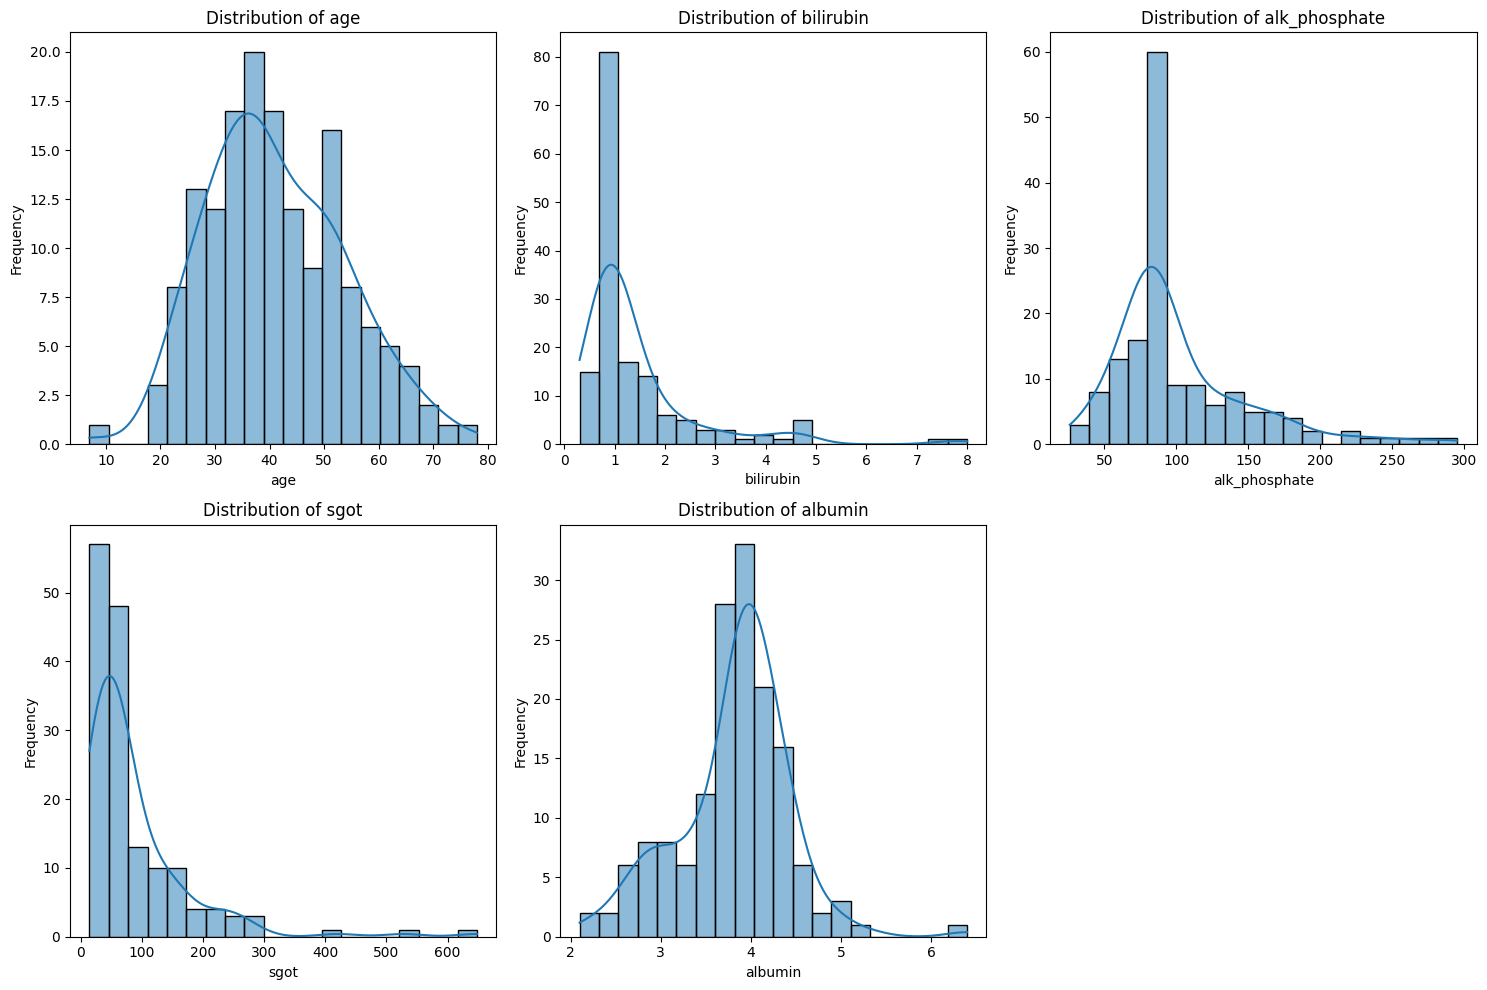

In [15]:
# Histograms for numerical columns
sns.set_style=("whitegrid")
# sns.set_palette("pastel")
cols=3
rows=2
fig,axes=plt.subplots(rows,cols,figsize=(15,10))
axes=axes.flatten()
for i,col in enumerate(numeric_cols.columns):
    sns.histplot(numeric_cols[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

### Observations from Histograms

- **`age`** shows a relatively **uniform distribution**, with patients spread across a wide range. No major skewness, suggesting balanced representation of different age groups.
- Most other numeric columns have **right-skewed** distributions, including `alk_phosphate`, `bilirubin`, and `sgot`, which justifies the use of **median** for imputing missing values.
- **`albumin`** is more **normally distributed**, making the **mean** a suitable choice for imputation.
- No extreme outliers were clearly visible, but some variables show mild long tails, hinting at possible natural variation or subtle outliers.
- Overall, the visualizations confirm our earlier cleaning decisions were aligned with the data’s distribution.

### Boxplots for Numeric Columns

Plotted boxplots for all numeric columns to detect potential outliers and understand the spread of values.

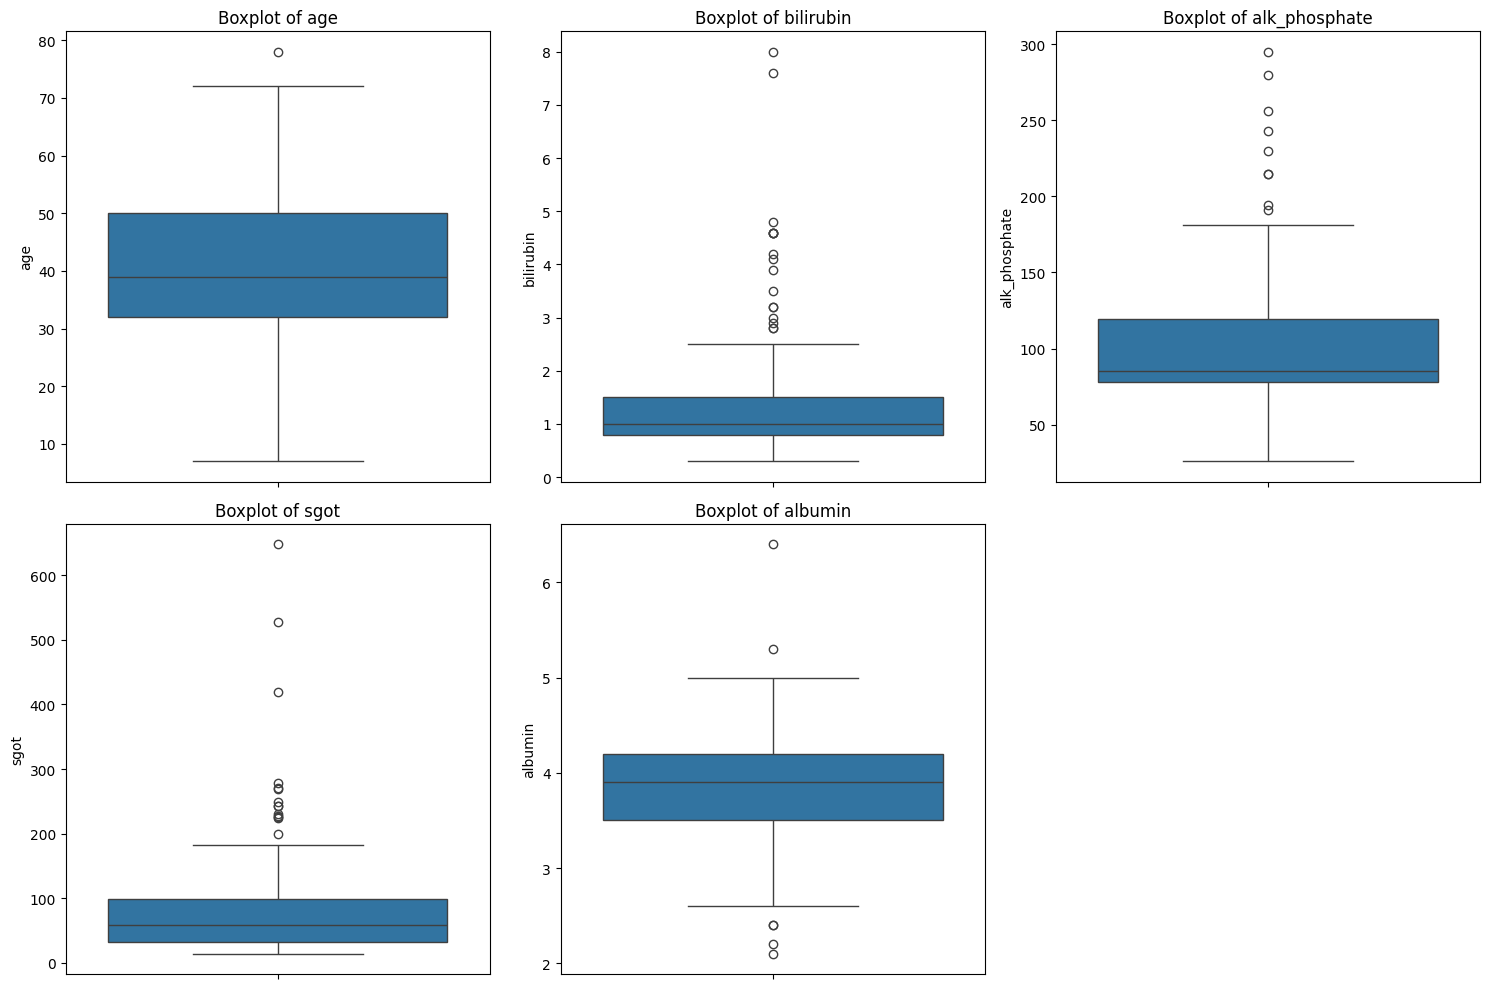

In [16]:
# Boxplot for numerical columns
sns.set_style=("whitegrid")
rows=2
cols=3
fig,axes=plt.subplots(rows,cols,figsize=(15,10))
axes=axes.flatten()
for i,col in enumerate(numeric_cols.columns):
    sns.boxplot(y=col,data=numeric_cols,ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

### Observations from Boxplots

- **Outliers** are present in several columns such as `alk_phosphate`, `bilirubin`, and `sgot`, which aligns with their right-skewed distributions.
- **`age`** shows a fairly uniform distribution with **no significant outliers**, indicating a well-spread dataset for age.
- **`albumin`** has a compact, symmetric shape with minimal outliers, confirming it’s closer to a normal distribution.
- These boxplots help identify which numeric features might need transformation or outlier treatment during modeling.


### Visualizing Categorical Columns

Used `countplot()` to visualize the frequency of each category in all categorical columns. This helps identify dominant classes, balance issues, and patterns worth exploring further.

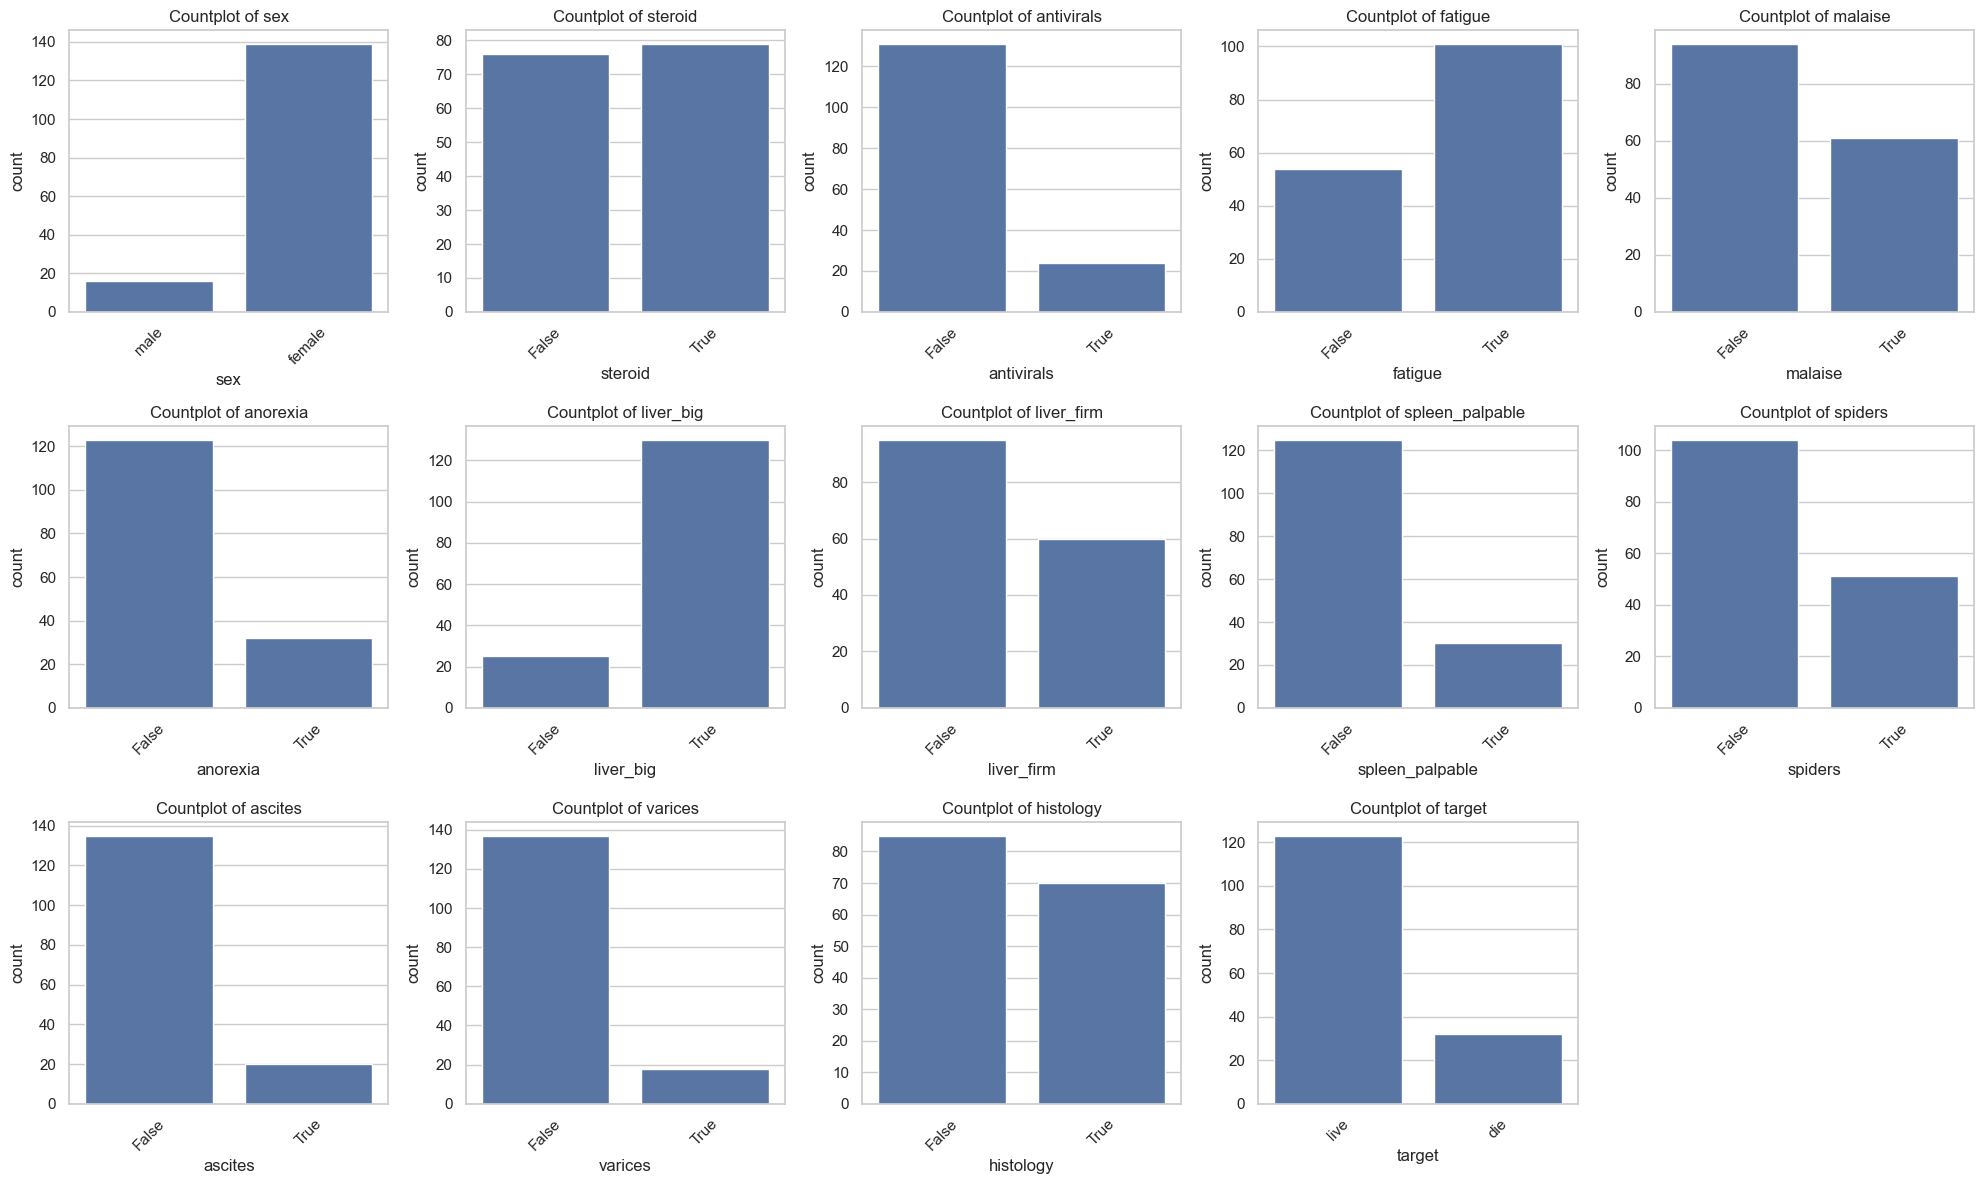

In [17]:
# For categorical columns, we will create count plots to visualize the distribution of each category.
sns.set_theme(style="whitegrid")  # makes it prettier
rows = 3
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(categorical_cols.columns):
    sns.countplot(x=col, data=categorical_cols, ax=axes[i])
    axes[i].set_title(f"Countplot of {col}",fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

### Observations from Countplots

- Most categorical features have **binary values**, and some show clear **class imbalance**. For example:
  - Variables like `steroid`, `antivirals`, and `malaise` have more False than True values.
  - Columns like `ascites` and `varices` show very few positive cases.
- The **`sex`** column is skewed toward **females**, meaning this dataset has more female patients.
- The **`target`** column (i.e., survival outcome) is also **imbalanced**, with more survivors than non-survivors.
- These plots help us spot where balancing techniques or stratification might be needed in modeling.

### Bivariate Analysis

### Bivariate Analysis: Numeric Features vs Target

We used `stripplot()` to explore how each numeric column varies with respect to the `target` variable (survival). This helps us understand if certain numeric features show visible separation between classes (survived vs not survived).

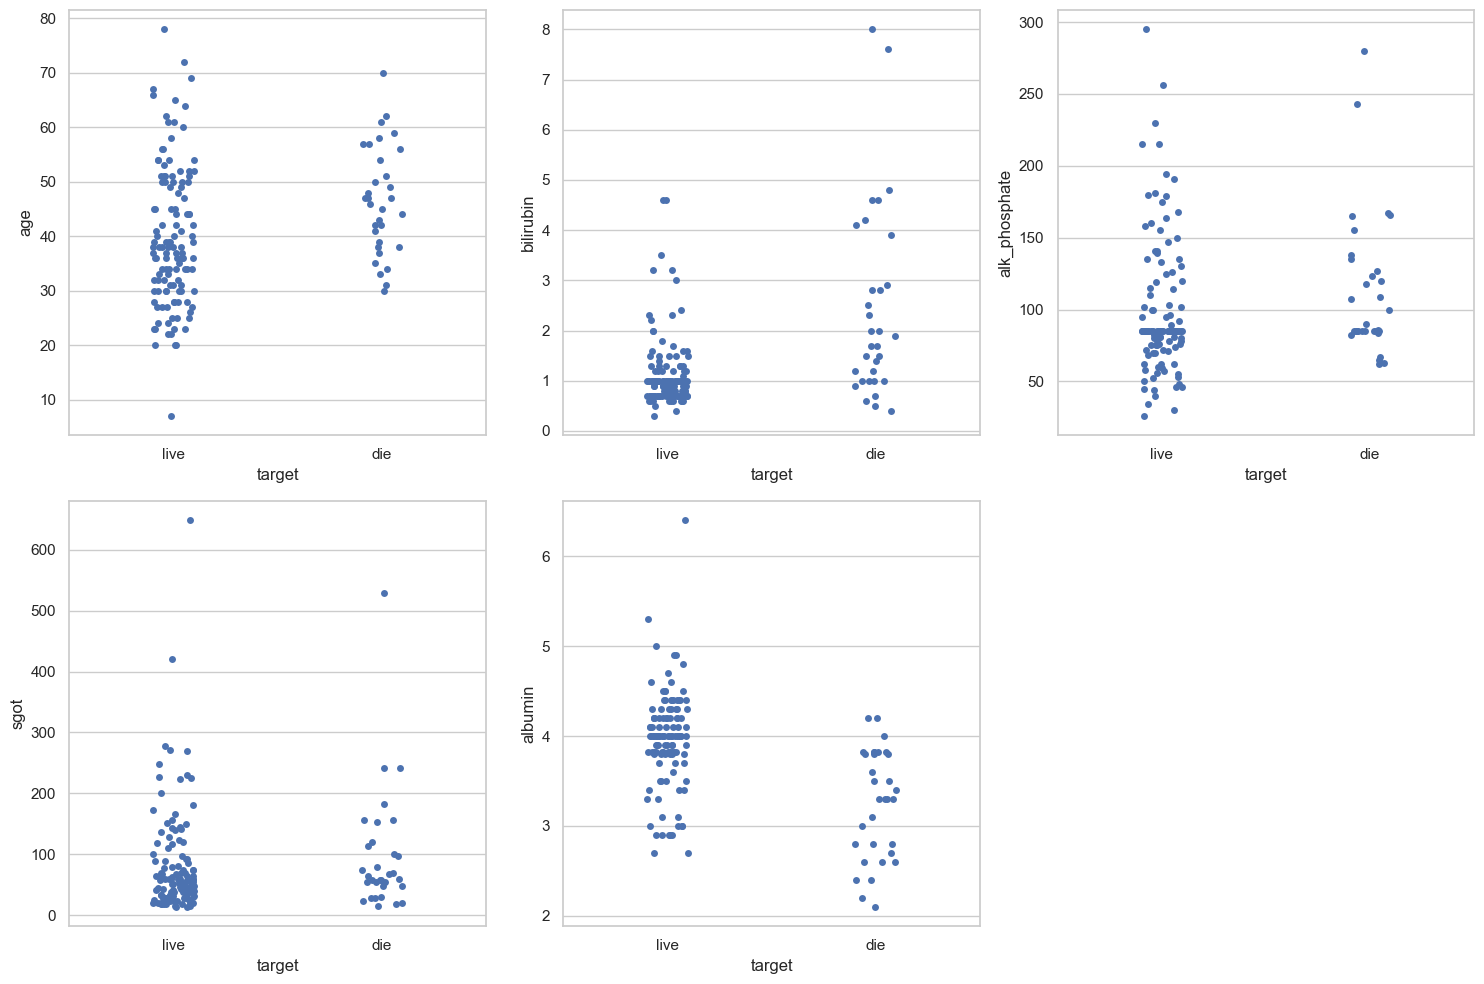

In [18]:
# relationship between target and numeric_cols
rows=2
cols=3
fig,axes=plt.subplots(rows,cols,figsize=(15,10))
axes=axes.flatten()

for i,col in enumerate(numeric_cols.columns):
    sns.stripplot(x=categorical_cols['target'], y=numeric_cols[col],ax=axes[i])
    plt.title(f"{col} Distribution by Target")
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


### Observations: Numeric Features vs Target

- **`bilirubin`, `alk_phosphate`, and `sgot`** tend to have higher values in patients who **did not survive**, indicating potential correlation with poor outcomes.
- **`albumin`** appears to be slightly **higher in survivors**, suggesting it might be a positive health indicator.
- **`age`** doesn't show a dramatic difference between target classes, but older individuals might have a slightly higher non-survival rate.
- These patterns can guide feature selection and highlight important predictors for modeling.

### Preparing Categorical Variables for Analysis

To perform correlation analysis and modeling, we converted boolean and categorical columns into numeric form:

- Converted all boolean columns (like `steroid`, `malaise`, `ascites`, etc.) to integers (`0` for False, `1` for True).
- Encoded the `target` column: `"live"` → `0` and `"die"` → `1`.
- Encoded the `sex` column: `"female"` → `0` and `"male"` → `1`.

Finally, we combined the cleaned numerical and categorical columns into a new DataFrame called `new_df_1`.

In [19]:
# converting boolean columns to numeric
categorical_cols=categorical_cols[["steroid","antivirals","fatigue","malaise","anorexia","liver_big","liver_firm","spleen_palpable","spiders","ascites","varices","histology"]].astype("int64")
categorical_cols=pd.concat([categorical_cols,new_df["target"]],axis=1)
categorical_cols["target"] = categorical_cols["target"].map({"live": 0, "die": 1})
categorical_cols=pd.concat([categorical_cols,new_df["sex"]],axis=1)
categorical_cols['sex'] = categorical_cols['sex'].map({'male': 1, 'female': 0})
#concating numeric and new categoric dataframe with new name
new_df_1=pd.concat([numeric_cols,categorical_cols],axis=1)
new_df_1.head()


,age,bilirubin,alk_phosphate,sgot,albumin,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,target,sex
0,30,1.0,85.0,18.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,50,0.9,135.0,42.0,3.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,78,0.7,96.0,32.0,4.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,31,0.7,46.0,52.0,4.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,34,1.0,85.0,200.0,4.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Correlation Analysis Using Heatmap

Now that all variables are numeric, we can generate a correlation matrix to visualize the strength of relationships between features using a heatmap.

This helps us:

- Identify which features are strongly correlated with the `target` (survival).
- Spot multicollinearity (i.e., features that are too closely related to each other, which can affect model performance).

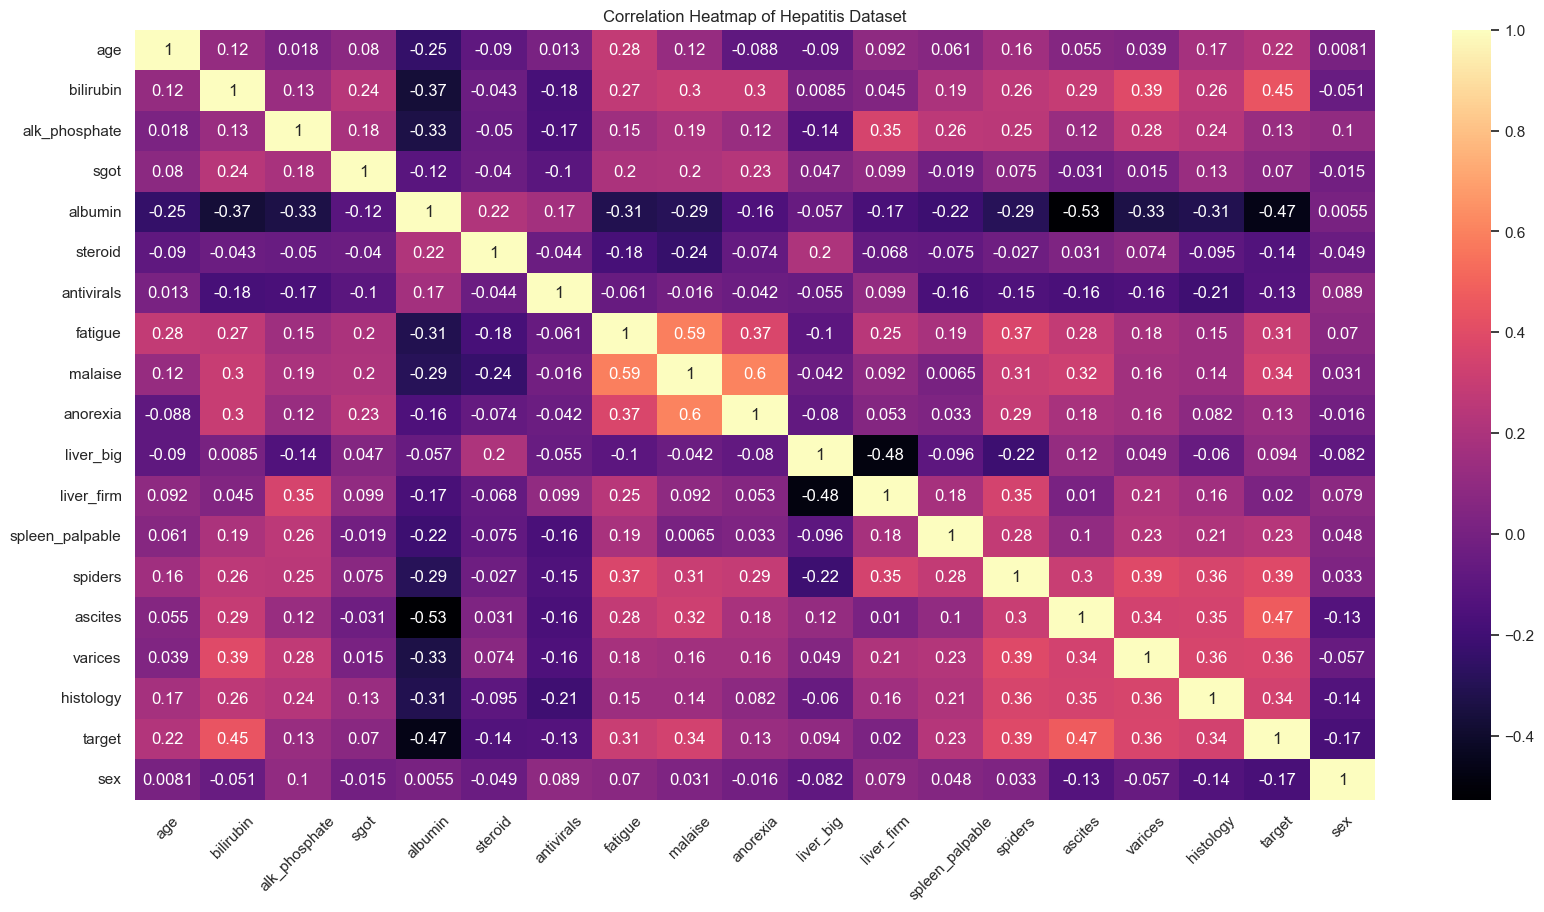

In [20]:
#Corelation heatmap
plt.figure(figsize=(20, 10))  # Make it bigger so it's readable
sns.heatmap(new_df_1.corr(numeric_only=True), annot=True, cmap="magma")
plt.title("Correlation Heatmap of Hepatitis Dataset")
plt.xticks(rotation=45)
plt.show()


### Observations from Correlation Heatmap

- **`bilirubin`, `sgot`, and `alk_phosphate`** show a **positive correlation** with the `target`, suggesting that higher values might be associated with non-survival.
- **`albumin`** is **negatively correlated** with the `target`, indicating higher albumin levels might be linked with better survival chances.
- Some variables like `spiders`, `ascites`, and `histology` show mild positive correlations with `target`, but not very strong.
- Overall, no pair of independent variables showed extremely high correlation (i.e., >0.9), so **multicollinearity is not a major concern**.

This step guides us in selecting key features for predictive modeling.

### Does Age Vary Significantly Between Patients Who Lived vs. Died?

We used a boxplot to visually compare the distribution of `age` between the two target classes: `live` and `die`.

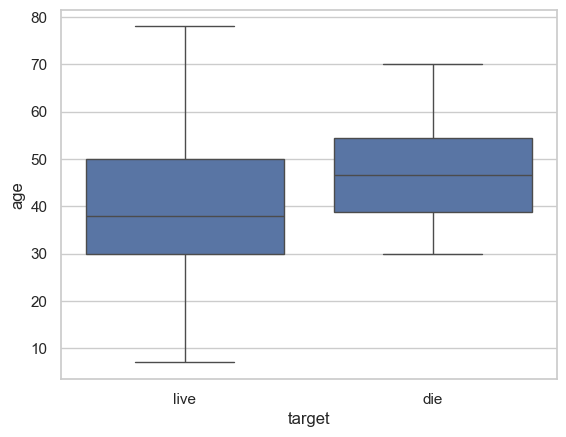

In [21]:
# Does age vary significantly between patients who live vs. die?

sns.boxplot(y="age",x="target",data=new_df)
plt.show()

### Observations:

- The **median age** of patients who **died** appears to be **higher** than those who survived.
- There is more spread in age among survivors, while patients who died seem to cluster around older ages.
- This suggests that **age may play a role in survival**, with older individuals being more at risk.
- However, the difference is **not dramatic**, so this relationship may need to be backed by statistical testing or combined with other variables to be meaningful.

### Does Sex Influence Survival?

We used a countplot to examine how survival (`target`) varies by `sex`.

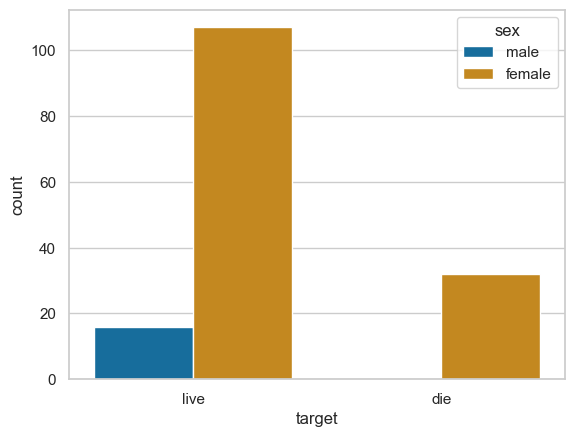

sex,female,male
target,,
die,32,0
live,107,16


In [22]:
# does sex influece target?

sns.countplot(x="target",hue="sex",data=new_df,palette="colorblind",order=["live","die"])
plt.show()
# Crosstab to see the relationship between target and sex
pd.crosstab(new_df["target"], new_df["sex"])


#### Observations:

- **All 32 deaths occurred in female patients.** There were **zero male deaths**.
- Among survivors, both **males (16)** and **females (107)** are present — but females still dominate in count.
- This shows a **clear imbalance** where **all non-survivors are female**, suggesting **sex may have a strong influence on survival** in this dataset.
- However, this could be due to **sampling bias** or a **small dataset**, so it’s worth being cautious and confirming with a **larger or more balanced dataset**.

### Does Steroid Use Influence Survival?

We visualized the relationship between `steroid` usage and `target` (survival) using a countplot.

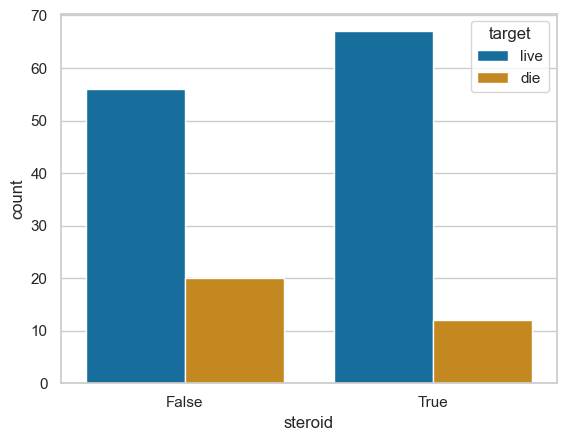

target,die,live
steroid,,
False,20,56
True,12,67


In [23]:
# does steroid influence target?

sns.countplot(x="steroid",hue="target",data=new_df,palette="colorblind")
plt.show()
pd.crosstab(new_df["steroid"], new_df["target"])



### Observation:
- **More patients who received steroids survived (67)** compared to those who didn’t (56).
- **Fewer deaths among steroid users (12)** vs. **non-users (20)**.
- This suggests that steroid treatment **might be associated with better survival**, but this is just a correlation — not a guarantee of causation.

### Does Antiviral Use Influence Survival?

We visualized the relationship between `antivirals` usage and `target` (survival outcome) using a countplot.

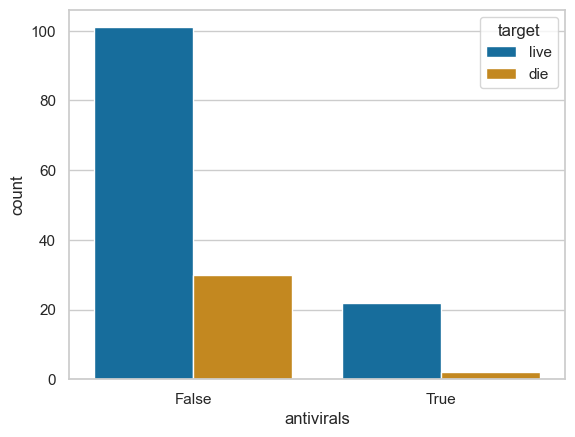

target,die,live
antivirals,,
False,30,101
True,2,22


In [24]:
# Are patients who got antivirals more likely to survive?
sns.countplot(x="antivirals",hue="target",data=new_df,palette="colorblind")
plt.show()
pd.crosstab(new_df["antivirals"], new_df["target"])

#### Observations:
- Among patients **who did not receive antivirals (`antivirals = False`)**, **30 died** while **101 survived**.
- Among those **who received antivirals (`antivirals = True`)**, **only 2 died**, and **22 survived**.
- This suggests that **antiviral treatment is strongly associated with higher survival rates**.
- While the results are promising, it's important to note that **this is still correlational** — not definitive evidence that antivirals caused better outcomes.

### Does Having Fatigue Impact Survival?

We visualized the relationship between `fatigue` and `target` (survival outcome) using a countplot.

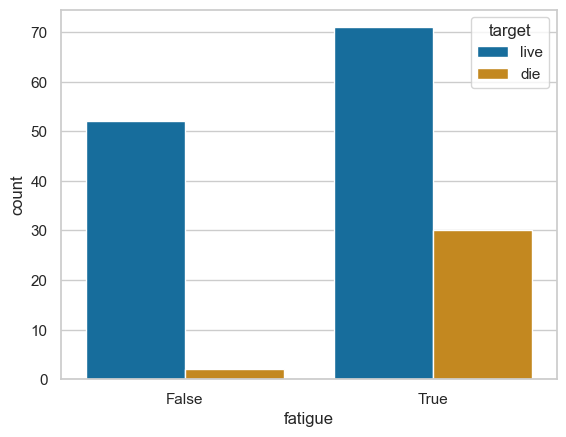

target,die,live
fatigue,,
False,2,52
True,30,71


In [25]:
#  Does having fatigue impact survival?

sns.countplot(x="fatigue",hue="target",data=new_df,palette="colorblind")
plt.show()
pd.crosstab(new_df["fatigue"], new_df["target"])

#### Observations:
- Among patients **without fatigue (`fatigue = False`)**, **only 2 died**, while **52 survived** — a very high survival rate.
- Among those **with fatigue (`fatigue = True`)**, **30 died** and **71 survived** — survival rate is still higher, but death count is significantly more.
- This suggests that **presence of fatigue might be linked to a higher risk of death**, while those **without fatigue showed much better survival outcomes**.
- Again, this is just a pattern — not a causal relationship, but definitely something worth deeper analysis.

### Is Anorexia Related to Patient Outcome?

We visualized the relationship between `anorexia` and `target` (survival outcome) using a countplot.

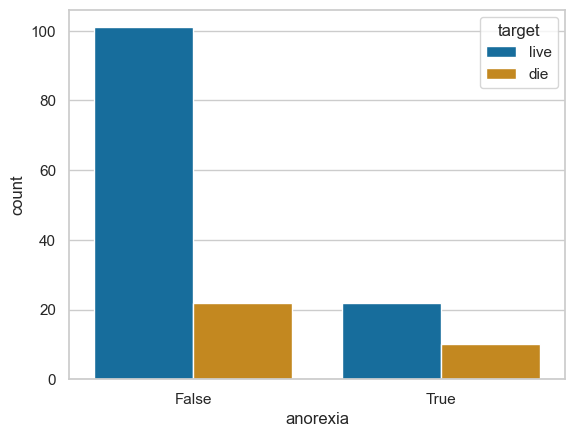

target,die,live
anorexia,,
False,22,101
True,10,22


In [44]:
# Is anorexia related to the patient outcome?

sns.countplot(x="anorexia",hue="target",data=new_df,palette="colorblind")
plt.show()
pd.crosstab(new_df["anorexia"], new_df["target"])

#### Observations:
- Among patients **without anorexia (`anorexia = False`)**, **22 died** and **101 survived** — a strong survival trend.
- Among those **with anorexia (`anorexia = True`)**, **10 died** and **22 survived** — noticeably fewer patients, but the **death rate is relatively higher**.
- This suggests that the **presence of anorexia may be linked to worse outcomes**, though more data would be needed to confirm its impact.

### Does Having a Firm Liver Relate to Higher Death Rates?

We analyzed the relationship between `liver_firm` and `target` (survival outcome) using a countplot.

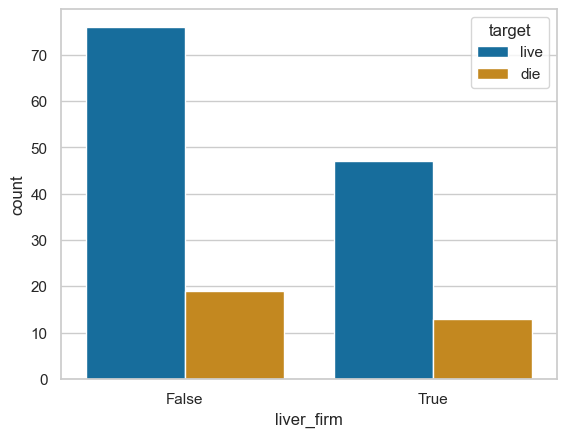

target,die,live
liver_firm,,
False,19,76
True,13,47


In [45]:
# Does having a firm liver relate to higher death rates?
sns.countplot(x="liver_firm",hue="target",data=new_df,palette="colorblind")
plt.show()
pd.crosstab(new_df["liver_firm"], new_df["target"])

#### Observations:
- Among patients **without a firm liver (`liver_firm = False`)**, **19 died** and **76 survived**.
- Among those **with a firm liver (`liver_firm = True`)**, **13 died** and **47 survived**.
- While survival is still more common in both groups, the **proportion of deaths is slightly higher** in patients with a firm liver.
- This could suggest that liver firmness might be a subtle indicator of severity, but we’d need more clinical context or testing to say for sure.

### Does Age Correlate with Bilirubin Levels?

We analyzed the relationship between `age` and `bilirubin` using a regression plot (`lmplot`) and calculated the Pearson correlation coefficient.

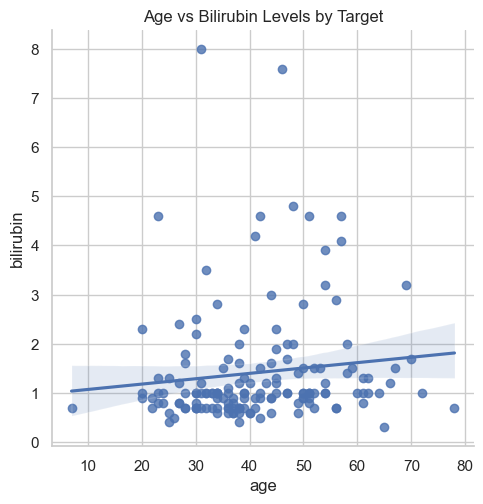

0.1152052958805015


In [48]:
#  Does age correlate with bilirubin levels?
sns.lmplot(x="age", y="bilirubin", data=new_df, palette="colorblind")
plt.title("Age vs Bilirubin Levels by Target")
plt.show()
print(new_df["age"].corr(new_df["bilirubin"]))

#### Observations:
- The correlation coefficient between `age` and `bilirubin` is **0.115**, indicating a **very weak positive relationship**.
- The scatterplot shows **no clear trend**; the regression line is almost flat with a slight upward tilt.
- This means **age does not meaningfully predict bilirubin levels** in this dataset.

### Is There a Relationship Between Alk Phosphate and SGOT?

We visualized the relationship between `alk_phosphate` and `sgot` using a scatterplot with a regression line (`lmplot`) and computed the Pearson correlation.

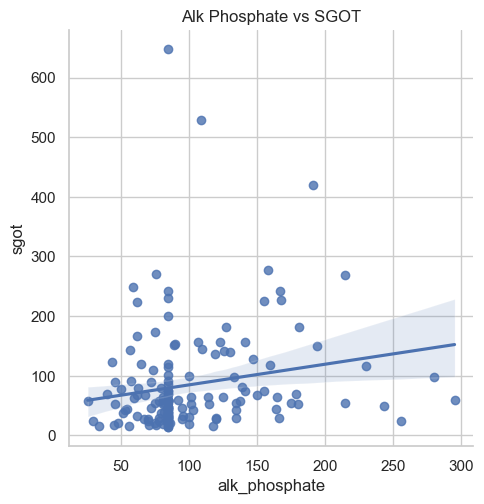

0.18442552016224323


In [49]:
# Is there a relationship between alk_phosphate and SGOT?

sns.lmplot(x="alk_phosphate", y="sgot", data=new_df, palette="colorblind")
plt.title("Alk Phosphate vs SGOT")
plt.show()
print(new_df["alk_phosphate"].corr(new_df["sgot"]))

#### Observations:
- The correlation between `alk_phosphate` and `sgot` is **0.184**, suggesting a **weak positive relationship**.
- The plot shows a slight upward trend — as `alk_phosphate` increases, `sgot` tends to increase too, but the relationship isn't strong.
- This may hint at a mild association between these two liver function indicators, though **more analysis is needed** to make clinical interpretations.

### Do Albumin and Bilirubin Show Any Linear Correlation?

We explored the relationship between `albumin` and `bilirubin` using a regression plot (`lmplot`) and calculated the Pearson correlation coefficient.

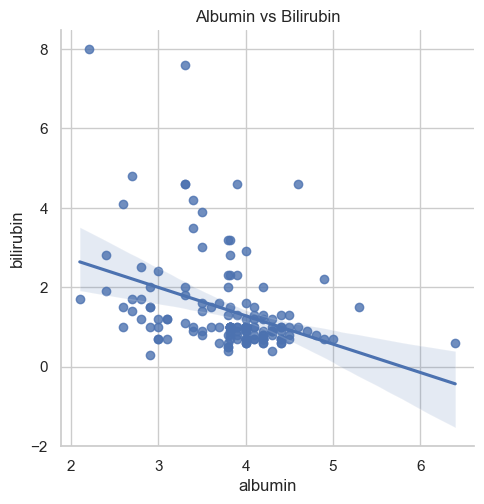

-0.36981631577142166


In [30]:
# Do albumin and bilirubin show any linear correlation?
sns.lmplot(x="albumin", y="bilirubin", data=new_df, palette="colorblind")
plt.title("Albumin vs Bilirubin")
plt.show()
print(new_df["albumin"].corr(new_df["bilirubin"]))


#### Observations:
- The correlation coefficient is **-0.37**, indicating a **moderate negative relationship**.
- As `albumin` levels increase, `bilirubin` levels tend to decrease.
- This makes sense medically too — lower albumin and higher bilirubin can both signal liver dysfunction.
- The regression line confirms this downward trend, showing a more **noticeable linear pattern** compared to other pairs in the dataset.

### Does Age Affect the Chance of Survival?

We plotted a stacked histogram of `age` distributions, split by the `target` (survival status), to explore whether age influences survival outcomes.

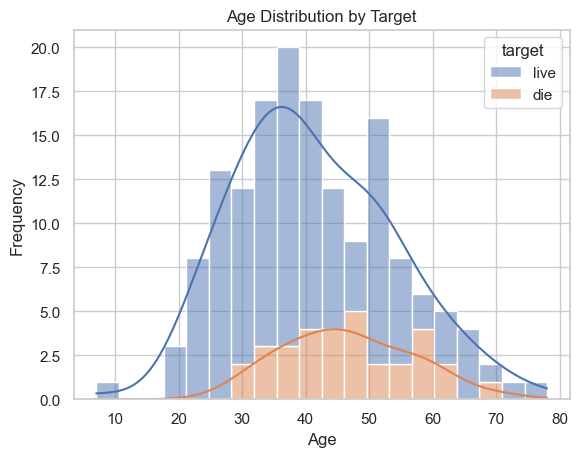

In [31]:
# Does age affect the chance of survival (target)?
sns.histplot(data=new_df, x="age", hue="target", multiple="stack", kde=True, bins=20)
plt.title("Age Distribution by Target")
plt.xlabel("Age")   
plt.ylabel("Frequency")
plt.show()

#### Observations:
- The histogram shows that **younger patients are more likely to survive**, while **older patients are overrepresented in the 'die' category**.
- The KDE curves confirm this: the curve for "live" is **skewed towards younger ages**, while the "die" curve is **more spread out and shifted towards older ages**.
- This suggests that **age may be a contributing factor in patient survival**, with increasing age possibly associated with higher risk of death.

### Does Bilirubin Affect the Chance of Survival?

We visualized the distribution of `bilirubin` levels for patients who lived versus those who died using a boxplot.

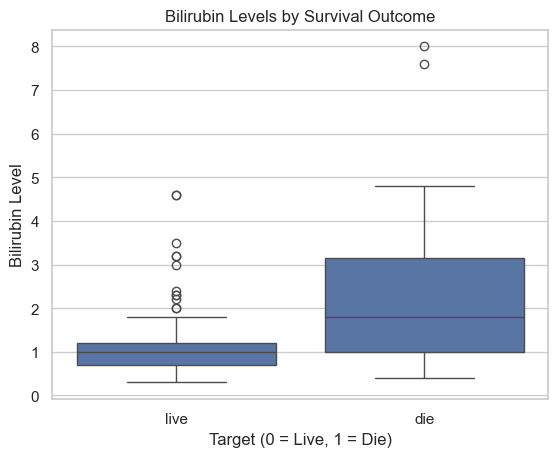

In [ ]:
# Does bilirubin affect the chance of survival (target)?
sns.boxplot(x="target", y="bilirubin", data=new_df)
plt.title("Bilirubin Levels by Survival Outcome")
plt.xlabel("Target (0 = Live, 1 = Die)")
plt.ylabel("Bilirubin Level")
plt.show()

#### Observations:
- Patients who **died** generally had **higher bilirubin levels** compared to those who survived.
- The median bilirubin value is noticeably higher in the "die" group.
- The spread (IQR) is also wider for the "die" group, suggesting more extreme bilirubin values among those patients.
- This supports the idea that **elevated bilirubin may be linked to worse outcomes**, possibly due to liver dysfunction.

### How Does Albumin Level Vary with the Outcome?

We plotted a boxplot of `albumin` levels across the two survival outcomes (`target`) to observe any differences.

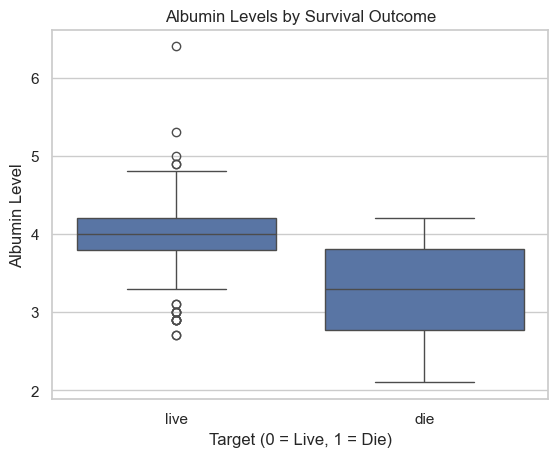

In [53]:
# How does albumin level vary with the outcome (target)?
sns.boxplot(x="target", y="albumin", data=new_df)
plt.title("Albumin Levels by Survival Outcome")
plt.xlabel("Target (0 = Live, 1 = Die)")
plt.ylabel("Albumin Level")
plt.show()

#### Observations:
- Patients who **survived** had **higher albumin levels** on average.
- The "die" group had a **lower median albumin** and a narrower range.
- This suggests that **lower albumin levels may be associated with a higher risk of death**, possibly indicating poor liver function or malnutrition.

### Is There a Significant Difference in SGOT Levels Between Outcomes?

We visualized SGOT levels across survival outcomes (`target`) using a boxplot and conducted a statistical test to explore the difference.

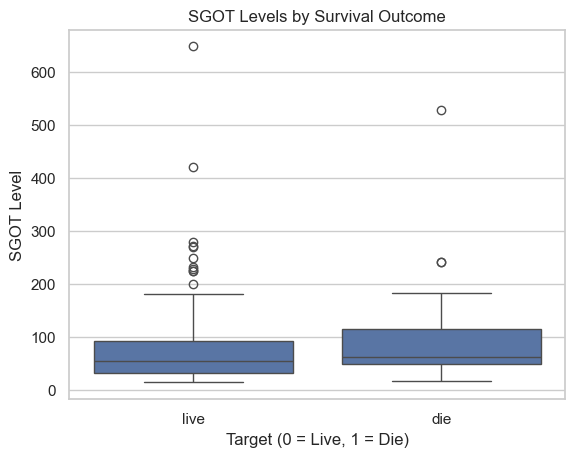

T-statistic: -0.793
P-value: 0.4318


In [54]:
# Is there a significant difference in SGOT levels between outcomes?
sns.boxplot(x="target", y="sgot", data=new_df)
plt.title("SGOT Levels by Survival Outcome")
plt.xlabel("Target (0 = Live, 1 = Die)")
plt.ylabel("SGOT Level")
plt.show()

from scipy.stats import ttest_ind

# Split the SGOT values by survival outcome
live_sgot = new_df_1[new_df_1["target"] == 0]["sgot"]
die_sgot = new_df_1[new_df_1["target"] == 1]["sgot"]

# Run independent t-test
t_stat, p_val = ttest_ind(live_sgot, die_sgot, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")


#### Observations:
- The boxplot shows a slight visual difference in SGOT levels between patients who lived and those who died.
- However, the **independent t-test** (Welch’s) shows:
  - **T-statistic:** -0.793
  - **P-value:** 0.4318
- Since the **p-value > 0.05**, we **fail to reject the null hypothesis**, meaning there's **no statistically significant difference** in SGOT levels between the two groups.

### Multivariate Analysis

### Pairplot of Numerical Features by Survival Outcome

We created a pairplot to visualize pairwise relationships between all numerical features and the survival outcome (`target`).

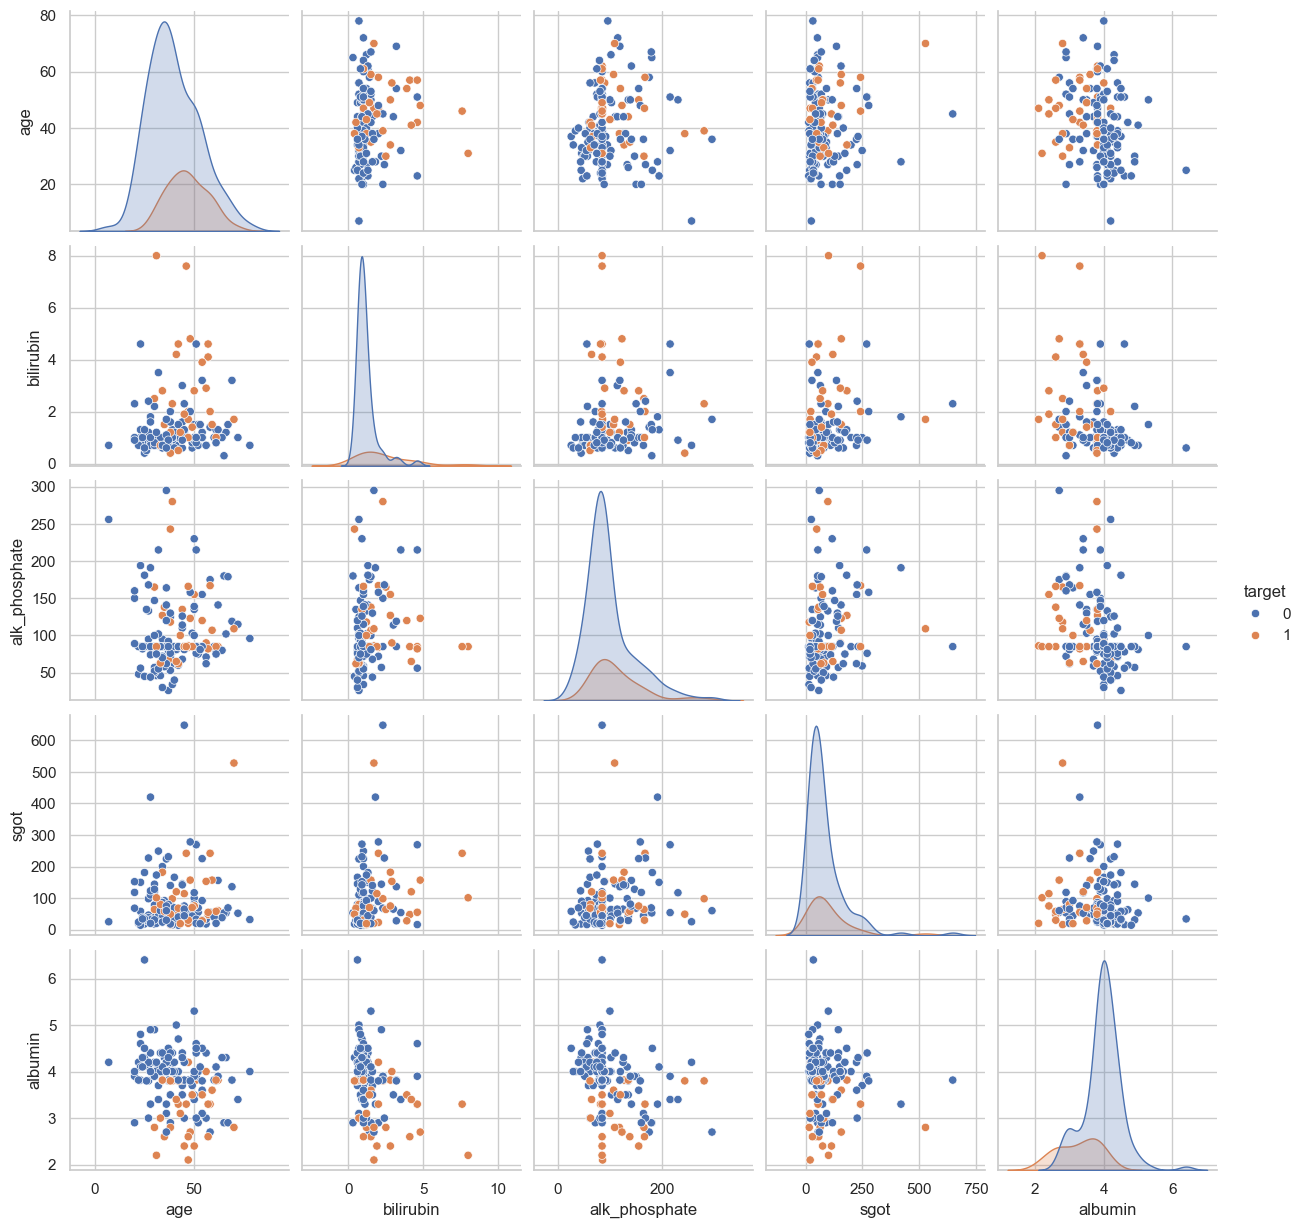

In [35]:
#for pairplot let's create new dataframe with only numeric columns and target column
pair_df = pd.concat([numeric_cols, new_df_1["target"]], axis=1)
#pair plot for numeric columns with target
sns.pairplot(pair_df, hue="target")
plt.show()


### Does Sex Combined with Steroid Usage Influence Survival?

We created a stacked bar chart to explore whether the **combination of `sex` and `steroid` usage** affects the survival outcome (`target`).

target          die  live
sex    steroid           
female False     20    47
       True      12    60
male   False      0     9
       True       0     7


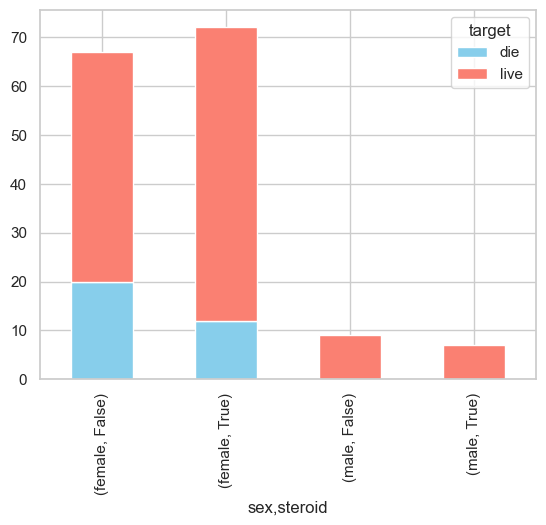

In [62]:
# Does sex + steroid usage influence survival?
# We will create a crosstab to see the relationship 
print(pd.crosstab([new_df["sex"], new_df["steroid"]], new_df["target"]))

pd.crosstab([new_df["sex"], new_df["steroid"]], new_df["target"]).plot(
    kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.show()

#### Observations:
- **Male patients who used steroids** show a higher survival rate compared to females in the same category.
- **Females not on steroids** had the **highest number of deaths**, suggesting that steroid usage might be **more beneficial for females**.
- **Males not using steroids** also had good survival outcomes, but their sample size is smaller.

This suggests that there might be an **interaction effect between sex and steroid treatment** that impacts survival, which could be explored more deeply in modeling.

### Does Fatigue Along with Anorexia Affect Outcome?

We visualized the relationship between the **combination of `fatigue` and `anorexia` symptoms** and survival outcomes using a stacked bar chart.


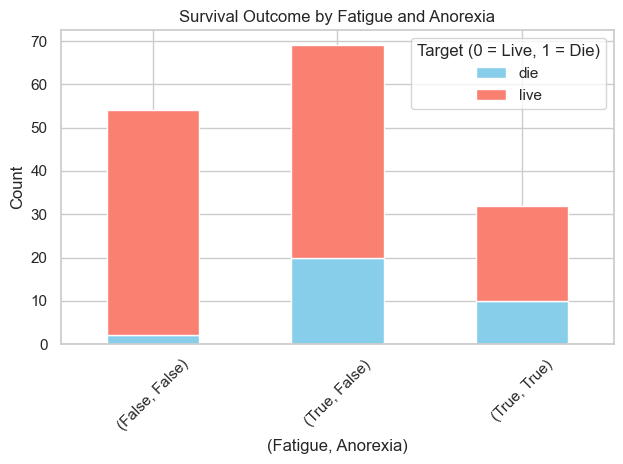

target            die  live
fatigue anorexia           
False   False       2    52
True    False      20    49
        True       10    22

In [60]:
# Does fatigue along with anorexia affect outcome?
pd.crosstab([new_df["fatigue"], new_df["anorexia"]], new_df["target"]).plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "salmon"]
)

plt.title("Survival Outcome by Fatigue and Anorexia")
plt.xlabel("(Fatigue, Anorexia)")
plt.ylabel("Count")
plt.legend(title="Target (0 = Live, 1 = Die)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Crosstab to see the relationship between fatigue, anorexia, and target
pd.crosstab([new_df["fatigue"], new_df["anorexia"]], new_df["target"])

#### Observations:
- Patients with **neither fatigue nor anorexia** had the **highest survival rate** (52 lived vs. 2 died) — this group clearly fared best.
- Those with **fatigue but no anorexia** had a higher death count (20 died), though still more survived (49 lived).
- The **worst outcomes** were in patients who had **both fatigue and anorexia**, with a **higher proportion of deaths** (10 died vs. 22 lived) than the other groups.

#### Conclusion:
Having **both fatigue and anorexia** seems to **increase the risk of death**, whereas **the absence of both symptoms** strongly correlates with survival.

### Are People with Both Ascites and Spiders More Likely to Die?

We analyzed the survival outcome based on whether patients had both **ascites** (abdominal fluid buildup) and **spiders** (spider angiomas). This was visualized using a stacked bar chart and supported by a crosstab.

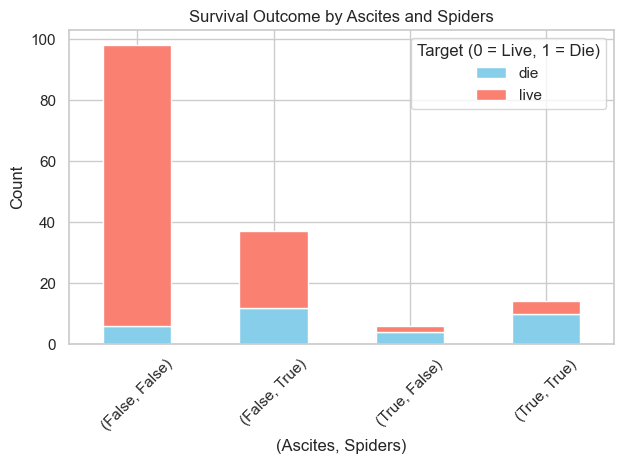

target           die  live
ascites spiders           
False   False      6    92
        True      12    25
True    False      4     2
        True      10     4

In [59]:
# Are people with both ascites and spiders more likely to die?
pd.crosstab([new_df["ascites"], new_df["spiders"]], new_df["target"]).plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "salmon"]
)
plt.title("Survival Outcome by Ascites and Spiders")
plt.xlabel("(Ascites, Spiders)")
plt.ylabel("Count")
plt.legend(title="Target (0 = Live, 1 = Die)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Crosstab to see the relationship between ascites, spiders, and target
pd.crosstab([new_df["ascites"], new_df["spiders"]], new_df["target"])

#### Observations:
- The **best survival** outcomes were for patients with **no ascites and no spiders** — 92 lived, only 6 died.
- Patients with **both ascites and spiders** had **very poor outcomes** — 10 died, only 4 lived.
- Even among those with **only one of the two symptoms**, survival dropped:
  - Ascites only: 4 died, 2 lived.
  - Spiders only: 12 died, 25 lived.

#### Conclusion:
Having **both ascites and spider angiomas** appears to **significantly increase the likelihood of death**. These symptoms together may indicate more advanced liver damage or complications.

### Does a History of Histology and Presence of Varices Impact Survival?

We explored whether the **presence of varices** (enlarged veins, often due to liver disease) and a positive **histology** result influence survival. The analysis was visualized using a stacked bar chart, backed by a crosstab.

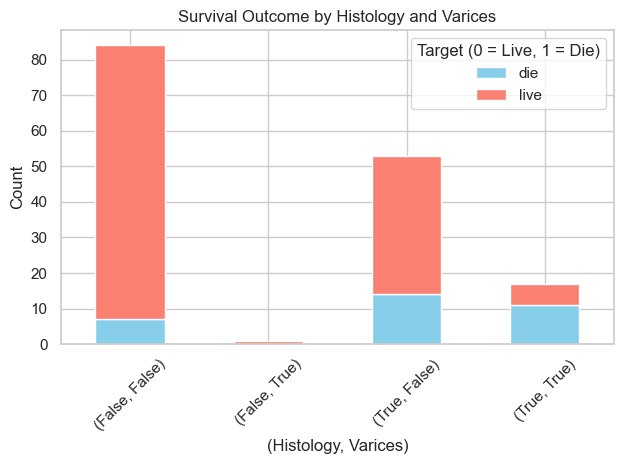

target             die  live
histology varices           
False     False      7    77
          True       0     1
True      False     14    39
          True      11     6

In [63]:
#  Does a history of histology and presence of varices impact survival?
pd.crosstab([new_df["histology"], new_df["varices"]], new_df["target"]).plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "salmon"]
)
plt.title("Survival Outcome by Histology and Varices")
plt.xlabel("(Histology, Varices)")
plt.ylabel("Count")
plt.legend(title="Target (0 = Live, 1 = Die)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Crosstab to see the relationship between histology, varices, and target
pd.crosstab([new_df["histology"], new_df["varices"]], new_df["target"])

#### Observations:
- Patients with **no histology and no varices** had the **best outcomes** — 77 lived, only 7 died.
- The **worst outcomes** were seen in patients with **both histology and varices** — 11 died, only 6 lived.
- Among patients with **positive histology but no varices**, survival was better (39 lived vs. 14 died), but still riskier than those with no histology.
- Interestingly, **very few** patients had varices but no histology — just one lived, none died, making it an outlier.

#### Conclusion:
Patients with **both a positive histology result and the presence of varices** are **far more likely to die** than those without. These features may signal advanced liver pathology and should be considered high-risk indicators.

### Do Antivirals Help Patients with an Enlarged Liver Survive Better?

We examined whether **antiviral treatment** influences survival in patients with or without an **enlarged liver** (`liver_big`). A stacked bar chart and crosstab were used to visualize this relationship.

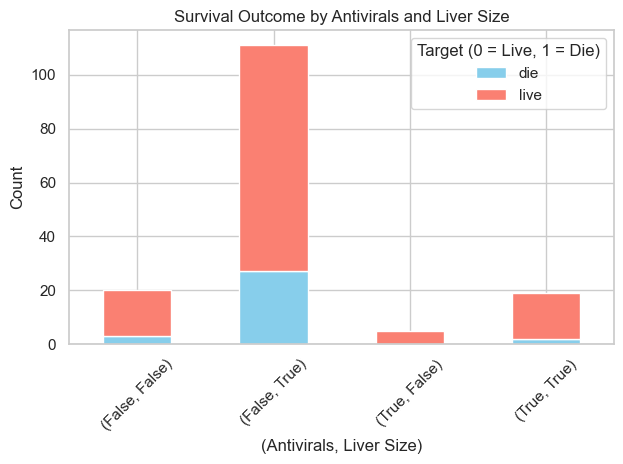

target                die  live
antivirals liver_big           
False      False        3    17
           True        27    84
True       False        0     5
           True         2    17

In [64]:
# Do antivirals help patients with big liver survive better?
pd.crosstab([new_df["antivirals"], new_df["liver_big"]], new_df["target"]).plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "salmon"]
)
plt.title("Survival Outcome by Antivirals and Liver Size")
plt.xlabel("(Antivirals, Liver Size)")
plt.ylabel("Count")
plt.legend(title="Target (0 = Live, 1 = Die)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Crosstab to see the relationship between antivirals, liver size, and target
pd.crosstab([new_df["antivirals"], new_df["liver_big"]], new_df["target"])

#### Observations:
- **Most patients with enlarged liver (liver_big=True)** who did **not** get antivirals had **poor outcomes**: 27 died vs. 84 lived.
- However, **among those with enlarged liver who got antivirals**, the death count dropped drastically to just **2 deaths**, with **17 surviving**.
- Patients with **normal liver and no antivirals** had fairly good outcomes (17 lived, only 3 died).
- Those with **normal liver and antivirals** had **zero deaths**.

#### Conclusion:
Antivirals **appear to significantly improve survival**, especially in patients with an **enlarged liver**. Among this high-risk group, antiviral treatment seems to **dramatically reduce the likelihood of death**.

### Do Steroids Help Patients with an Enlarged Liver Survive Better?

We examined the interaction between **steroid use** and **liver size** (`liver_big`) to see if steroids improve survival outcomes in patients with liver enlargement. A stacked bar chart and crosstab were used for analysis.

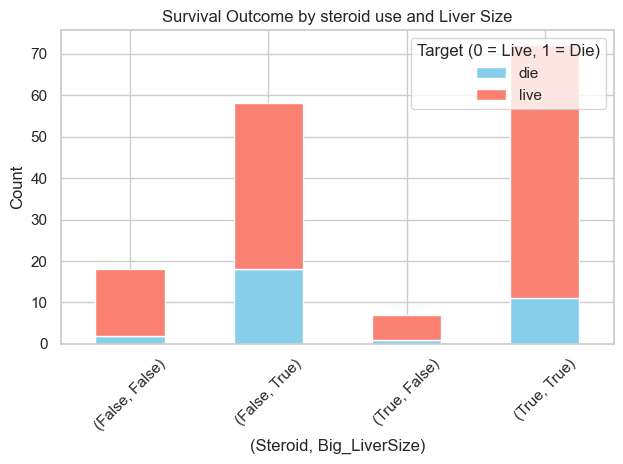

target             die  live
steroid liver_big           
False   False        2    16
        True        18    40
True    False        1     6
        True        11    61

In [69]:
# Do steroid use help patients with big liver survive better?
pd.crosstab([new_df["steroid"], new_df["liver_big"]], new_df["target"]).plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "salmon"]
)
plt.title("Survival Outcome by steroid use and Liver Size")
plt.xlabel("(Steroid, Big_LiverSize)")
plt.ylabel("Count")
plt.legend(title="Target (0 = Live, 1 = Die)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Crosstab to see the relationship between steroid, liver size, and target
pd.crosstab([new_df["steroid"], new_df["liver_big"]], new_df["target"])

#### 🔍 Observations:
- Among patients with **an enlarged liver**, those who received **steroids (11 died, 61 lived)** had better survival outcomes than those who **did not receive steroids (18 died, 40 lived)**.
- Even in patients **without an enlarged liver**, those given steroids showed slightly better survival (6 lived vs. 1 died).
- Overall, **steroid use is associated with improved survival**, especially in patients with **liver enlargement**, where the death rate is noticeably reduced.

#### ✅ Conclusion:
Steroid treatment **appears to positively impact survival**, particularly in patients with an enlarged liver. While this is **not a causal proof**, the pattern suggests a potential benefit that could be explored further in clinical studies.

### 🔧 Feature Engineering

To enrich our dataset and help capture deeper patterns, we engineered several new features by combining or transforming existing ones:

- `fatigue_anorexia`: Indicates whether the patient has **both fatigue and anorexia** symptoms.
- `steroid_antivirals`: Flags patients who received **both steroid and antiviral treatments**.
- `ascites_spiders`: Indicates the presence of **both ascites and spider angiomas**, which could signal advanced liver disease.
- `bilirubin_albumin_ratio`: A new numeric feature computed by dividing **bilirubin** by **albumin**. This ratio may serve as a proxy for **liver function severity**, since high bilirubin and low albumin levels are typically associated with poor outcomes.


In [72]:
new_df_1["fatigue_anorexia"] = new_df_1["fatigue"] & new_df_1["anorexia"]
new_df_1["steroid_antivirals"] = new_df_1["steroid"] & new_df_1["antivirals"]
new_df_1["ascites_spiders"] = new_df_1["ascites"] & new_df_1["spiders"]
new_df_1["bilirubin_albumin_ratio"]= new_df_1["bilirubin"] / new_df_1["albumin"]

### 🚨 Outlier Detection Report

#### Methodology
- Used **IQR (Interquartile Range) method** to calculate outlier percentages
- Applied to all numeric features in the dataset
- Thresholds:  
  - Lower bound = Q1 - 1.5×IQR  
  - Upper bound = Q3 + 1.5×IQR

#### ⚠️ Important Note  
Outliers were **only identified** for exploratory analysis purposes.  
No outlier handling/removal was performed at this stage.

In [ ]:
# Loop through each numeric column and calculate outlier percentage
for col in numeric_cols.columns:
    Q1 = new_df_1[col].quantile(0.25)
    Q3 = new_df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = new_df_1[(new_df_1[col] < lower_bound) | (new_df_1[col] > upper_bound)]
    outlier_percent = (len(outliers) / len(new_df_1)) * 100

    print(f"{col}: {outlier_percent:.2f}% outliers")


age: 0.65% outliers
bilirubin: 10.97% outliers
alk_phosphate: 5.81% outliers
sgot: 9.03% outliers
albumin: 3.87% outliers


### DataFrame Versions Overview

- **`df`**: Original raw dataframe (unprocessed data)
- **`new_df`**: Cleaned dataframe (handled missing values)
- **`new_df_1`**: Processed version of `new_df` with:
  - Boolean values converted to numeric (0/1)
  - Categorical values encoded numerically
  - Created specifically for visualization purposes (heatmaps, correlation analysis, etc.)

### 🧾 EDA Summary

The exploratory data analysis provided valuable insights into the hepatitis dataset:

- **Missing values** were identified and handled appropriately using median, mean, or mode based on feature distribution.
- **Outliers** were detected using the IQR method and their percentages were calculated, though no removal or transformation was applied.
- **Univariate analysis** revealed:
  - Right-skewed distributions for features like `bilirubin`, `alk_phosphate`, and `sgot`.
  - A roughly normal distribution for `albumin`.
  - An imbalanced `target` variable, with more patients surviving than dying.
- **Bivariate analysis** showed potential relationships between several features and the target:
  - Higher bilirubin and lower albumin levels were associated with death.
  - Fatigue, anorexia, ascites, and spider angiomas showed links to poorer outcomes.
  - Antiviral and steroid treatments appeared to improve survival rates.
- **Multivariate analysis** (including pairplots and correlation heatmaps) revealed:
  - No strong multicollinearity between numeric features.
  - Moderate negative correlation between `albumin` and `bilirubin`.
- **Feature engineering** added medically relevant and interaction-based features like:
  - `bilirubin_albumin_ratio`
  - `fatigue_anorexia`, `ascites_spiders`, `steroid_antivirals`
- These new features aim to capture subtle clinical interactions that could enhance predictive modeling.